#  Notebook 3: Exploratory Data Analysis (EDA)

## Objective
Analyze the cleaned startup funding dataset to uncover patterns, trends, and insights through:
- **Temporal Analysis:** Funding trends over time (2015-2020)
- **Geographic Analysis:** City-wise funding distribution
- **Industry Analysis:** Sector-wise investment patterns
- **Stage Analysis:** Funding amounts by stage
- **Investor Analysis:** Investor participation patterns
- **Correlation Analysis:** Relationships between variables

## Prerequisites
- Requires `startup_funding_clean.csv` from Notebook 2 (Data Cleaning)

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create visuals directory
import os
os.makedirs('../visuals/eda', exist_ok=True)

---
## 1. Load Cleaned Data

In [5]:
# Load cleaned data
df = pd.read_csv('../data/startup_funding_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
df.head()

Dataset shape: (3044, 22)
Date range: 2015-01-02 00:00:00 to 2020-01-13 00:00:00


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,...,Month,Quarter,Amount_INR,Amount_Lakhs,Amount_Crores,Funding_Amount_Log,Stage,Stage_Order,City_Clean,Investor_Count
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,...,1.0,1.0,200000000.0,2000.00000,20.000000,19.113828,Private Equity,9,Bengaluru,1
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,...,1.0,1.0,8048394.0,80.48394,0.804839,15.900983,Series C,7,Gurugram,1
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,...,1.0,1.0,18358860.0,183.58860,1.835886,16.725623,Series B,6,Bengaluru,1
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,...,1.0,1.0,3000000.0,30.00000,0.300000,14.914123,Pre-Series A,4,Delhi,1
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,...,1.0,1.0,1800000.0,18.00000,0.180000,14.403298,Seed,2,Mumbai,1


---
## 2. Temporal Analysis: Funding Trends Over Time

Analyze how startup funding evolved from 2015 to 2020.

In [6]:
# Yearly funding trends
yearly_stats = df.groupby('Year').agg({
    'Amount_Crores': ['sum', 'mean', 'count']
}).round(2)
yearly_stats.columns = ['Total_Funding_Cr', 'Avg_Funding_Cr', 'Deal_Count']
print("Yearly Funding Statistics:")
print(yearly_stats)

Yearly Funding Statistics:
        Total_Funding_Cr  Avg_Funding_Cr  Deal_Count
Year                                                
2015.0            859.72            1.32         652
2016.0            382.81            0.65         586
2017.0           1042.93            2.29         456
2018.0            511.61            1.94         264
2019.0            970.09            9.24         105
2020.0             39.02            5.57           7


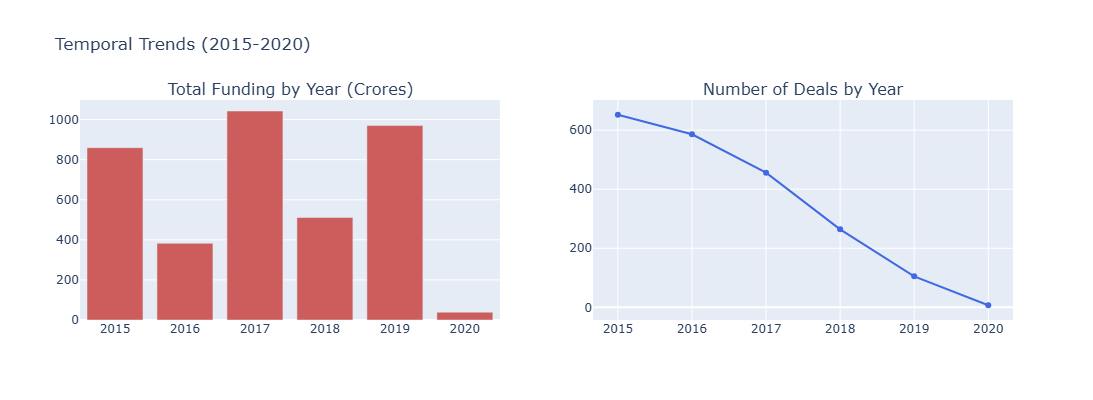

In [7]:
# Visualization: Yearly funding and deal count
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Total Funding by Year (Crores)', 'Number of Deals by Year'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}]]
)

# Total funding bar chart
fig.add_trace(
    go.Bar(x=yearly_stats.index, y=yearly_stats['Total_Funding_Cr'], 
           name='Total Funding', marker_color='indianred'),
    row=1, col=1
)

# Deal count line chart
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=yearly_stats['Deal_Count'], 
               mode='lines+markers', name='Deal Count', marker_color='royalblue'),
    row=1, col=2
)

fig.update_layout(height=400, showlegend=False, title_text="Temporal Trends (2015-2020)")
fig.write_html('../visuals/eda/yearly_trends.html')
fig.show()

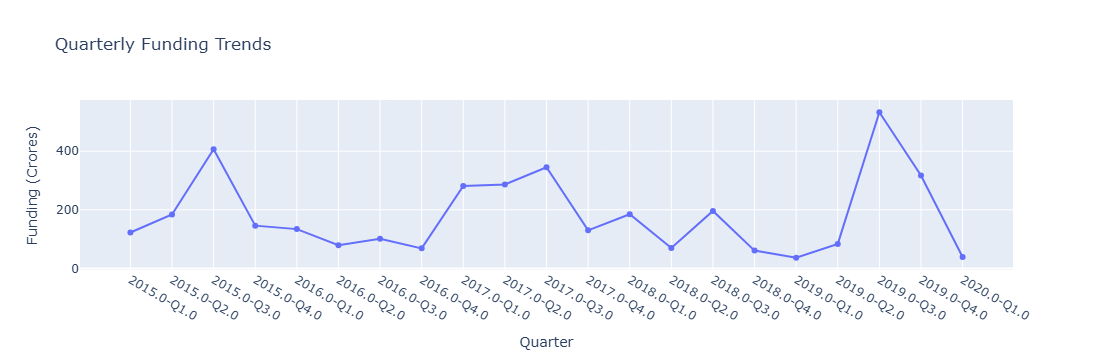

In [8]:
# Quarterly trends
quarterly_funding = df.groupby(['Year', 'Quarter'])['Amount_Crores'].sum().reset_index()
quarterly_funding['Year_Quarter'] = quarterly_funding['Year'].astype(str) + '-Q' + quarterly_funding['Quarter'].astype(str)

fig = px.line(quarterly_funding, x='Year_Quarter', y='Amount_Crores', 
              title='Quarterly Funding Trends',
              labels={'Amount_Crores': 'Funding (Crores)', 'Year_Quarter': 'Quarter'},
              markers=True)
fig.write_html('../visuals/eda/quarterly_trends.html')
fig.show()

---
## 3. Geographic Analysis: City-wise Distribution

Identify top startup hubs and their funding patterns.

In [9]:
# Top 15 cities by funding
city_stats = df.groupby('City_Clean').agg({
    'Amount_Crores': 'sum',
    'Startup Name': 'count'
}).round(2)
city_stats.columns = ['Total_Funding_Cr', 'Startup_Count']
city_stats = city_stats.sort_values('Total_Funding_Cr', ascending=False).head(15)

print("Top 15 Cities by Funding:")
print(city_stats)

Top 15 Cities by Funding:
                 Total_Funding_Cr  Startup_Count
City_Clean                                      
Bengaluru                 1847.45            841
Mumbai                     492.12            567
Gurugram                   387.12            337
Delhi                      329.16            455
Noida                      126.29             92
Chennai                     71.88             97
Pune                        63.31            105
Menlo Park                  45.00              1
Hyderabad                   40.11             99
California                  30.00              1
Kormangala                  28.40              2
Faridabad                   25.20              3
India/Singapore             22.60              1
Tulangan                    20.00              1
San Francisco               18.70              2


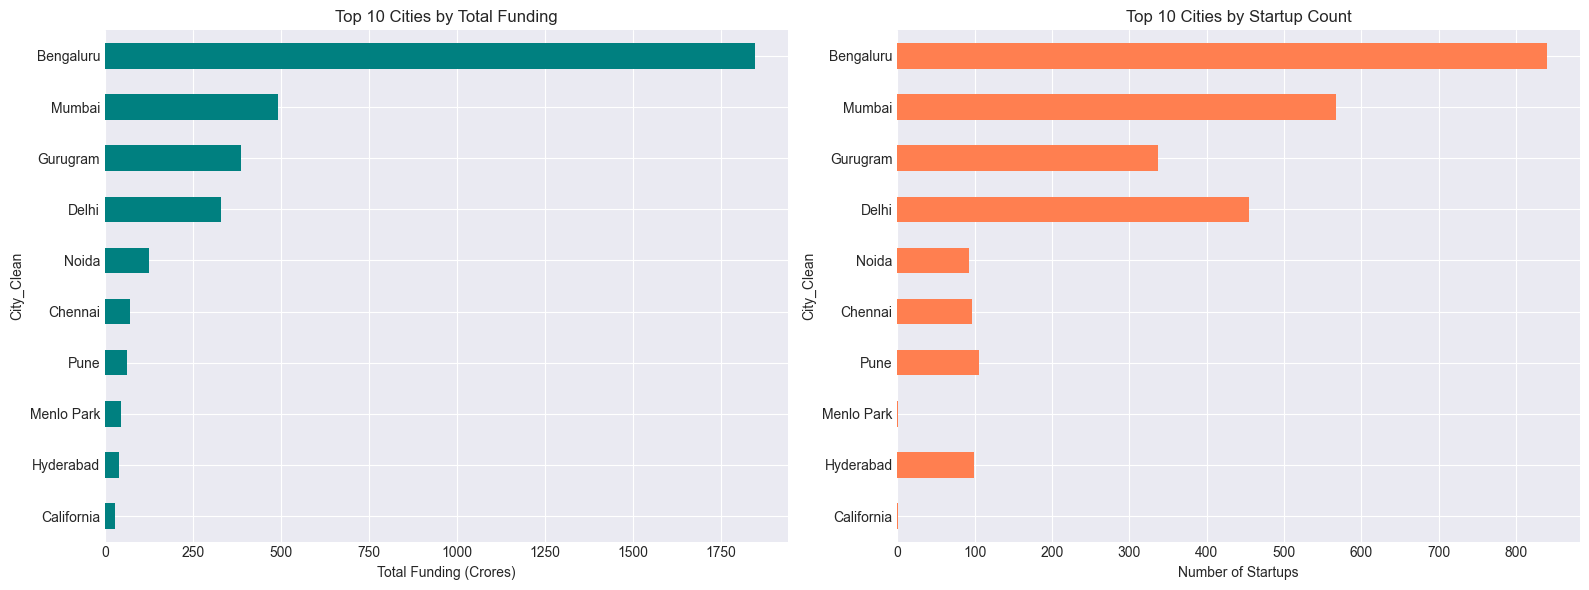

In [10]:
# Visualization: Top 10 cities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Total funding by city
city_stats.head(10)['Total_Funding_Cr'].plot(kind='barh', ax=ax1, color='teal')
ax1.set_xlabel('Total Funding (Crores)')
ax1.set_title('Top 10 Cities by Total Funding')
ax1.invert_yaxis()

# Startup count by city
city_stats.head(10)['Startup_Count'].plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Number of Startups')
ax2.set_title('Top 10 Cities by Startup Count')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('../visuals/eda/city_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 4. Industry Analysis: Sector-wise Investment

Examine which industries attracted the most funding.

In [11]:
# Top industries by funding
industry_stats = df.groupby('Industry Vertical').agg({
    'Amount_Crores': 'sum',
    'Startup Name': 'count'
}).round(2)
industry_stats.columns = ['Total_Funding_Cr', 'Deal_Count']
industry_stats = industry_stats.sort_values('Total_Funding_Cr', ascending=False).head(15)

print("Top 15 Industries by Funding:")
print(industry_stats)

Top 15 Industries by Funding:
                                    Total_Funding_Cr  Deal_Count
Industry Vertical                                               
Consumer Internet                             625.31         941
eCommerce                                     500.25         186
Transportation                                391.66           4
Technology                                    222.97         478
Finance                                       197.14          62
ECommerce                                     187.88          61
FinTech                                       122.07           9
E-Commerce                                    100.81          29
Online Marketplace                             70.01           2
E-Commerce & M-Commerce platform               68.00           1
B2B                                            58.70           2
Car Aggregator & Retail Mobile App             50.00           1
Ecommerce Marketplace                          50.00        

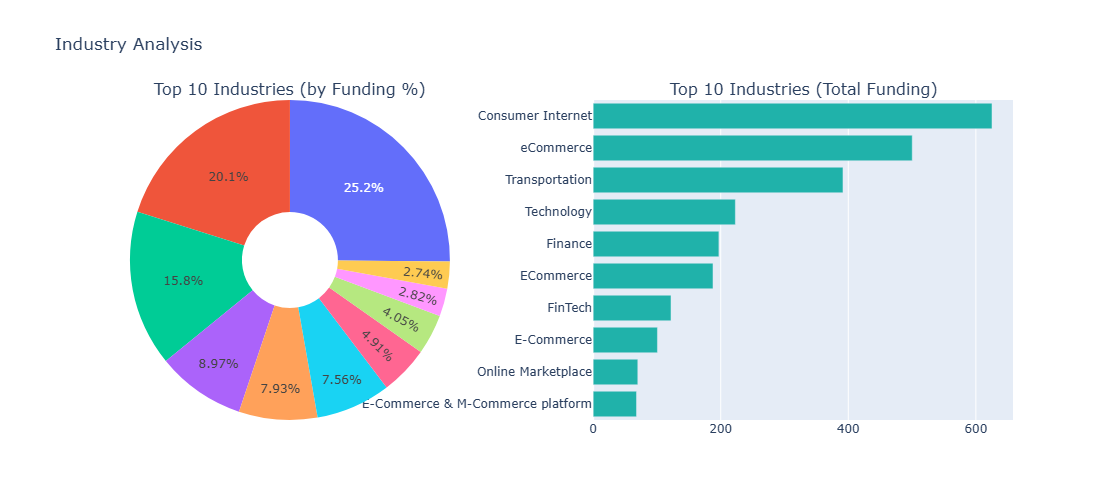

In [12]:
# Visualization: Industry pie chart (top 10) and bar chart
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "bar"}]],
    subplot_titles=('Top 10 Industries (by Funding %)', 'Top 10 Industries (Total Funding)')
)

# Pie chart
top10_industries = industry_stats.head(10)
fig.add_trace(
    go.Pie(labels=top10_industries.index, values=top10_industries['Total_Funding_Cr'],
           hole=0.3),
    row=1, col=1
)

# Bar chart
fig.add_trace(
    go.Bar(x=top10_industries['Total_Funding_Cr'], y=top10_industries.index,
           orientation='h', marker_color='lightseagreen'),
    row=1, col=2
)

fig.update_layout(height=500, showlegend=False, title_text="Industry Analysis")
fig.update_yaxes(autorange="reversed", row=1, col=2)
fig.write_html('../visuals/eda/industry_analysis.html')
fig.show()

---
## 5. Stage Analysis: Funding Distribution by Stage

Understand how funding amounts vary across different investment stages.

In [13]:
# Stage-wise funding statistics
stage_stats = df.groupby('Stage').agg({
    'Amount_Crores': ['count', 'sum', 'mean', 'median', 'std']
}).round(2)
stage_stats.columns = ['Deal_Count', 'Total_Funding_Cr', 'Avg_Funding_Cr', 'Median_Funding_Cr', 'Std_Dev']
stage_stats = stage_stats.sort_values('Total_Funding_Cr', ascending=False)

print("Funding Statistics by Stage:")
print(stage_stats)

Funding Statistics by Stage:
                 Deal_Count  Total_Funding_Cr  Avg_Funding_Cr  \
Stage                                                           
Private Equity         1083           2732.77            2.52   
Series B                 21            480.52           22.88   
Series D+                19            198.68           10.46   
Undisclosed              12            137.56           11.46   
Seed                    866            105.45            0.12   
Series C                 14            104.47            7.46   
Series A                 22             20.32            0.92   
Debt Funding             29             19.14            0.66   
Pre-Series A              8              4.44            0.55   
Corporate Round           1              3.81            3.81   
Angel                     2              0.05            0.02   

                 Median_Funding_Cr  Std_Dev  
Stage                                        
Private Equity                0.6

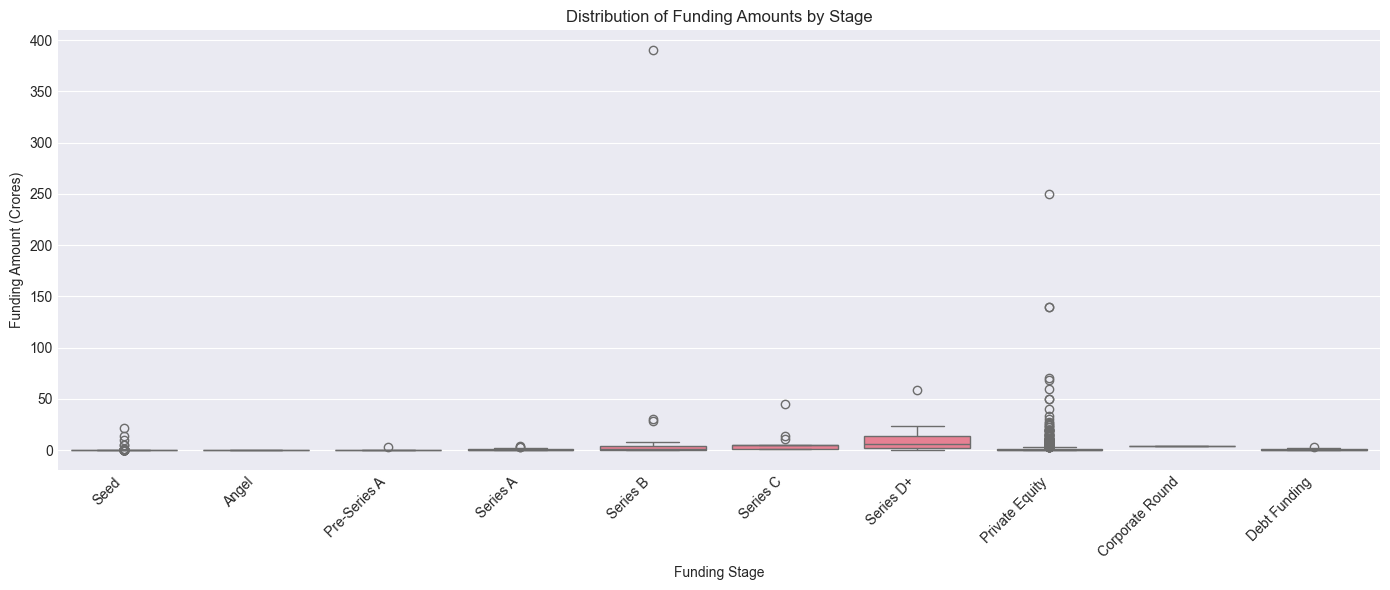

In [14]:
# Visualization: Box plot of funding amounts by stage (excluding Undisclosed)
df_stage = df[df['Stage'] != 'Undisclosed'].copy()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_stage, x='Stage', y='Amount_Crores', 
            order=df_stage.groupby('Stage')['Stage_Order'].first().sort_values().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Funding Stage')
plt.ylabel('Funding Amount (Crores)')
plt.title('Distribution of Funding Amounts by Stage')
plt.tight_layout()
plt.savefig('../visuals/eda/stage_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

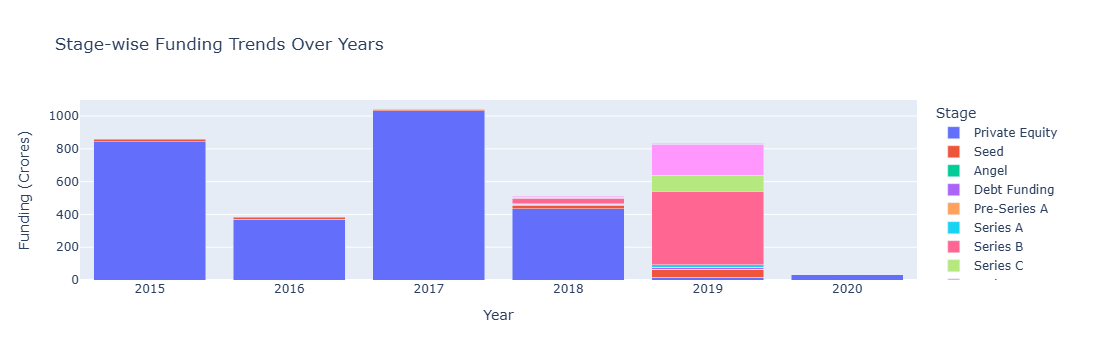

In [15]:
# Stage progression over years
stage_year = df[df['Stage'] != 'Undisclosed'].groupby(['Year', 'Stage'])['Amount_Crores'].sum().reset_index()

fig = px.bar(stage_year, x='Year', y='Amount_Crores', color='Stage',
             title='Stage-wise Funding Trends Over Years',
             labels={'Amount_Crores': 'Funding (Crores)'},
             barmode='stack')
fig.write_html('../visuals/eda/stage_yearly_trends.html')
fig.show()

---
## 6. Investor Analysis: Participation Patterns

Analyze investor involvement in startup funding.

In [16]:
# Investor count analysis
print("Investor Count Statistics:")
print(df['Investor_Count'].describe())

# Distribution of investor counts
investor_dist = df['Investor_Count'].value_counts().head(10).sort_index()
print("\nMost common investor counts:")
print(investor_dist)

Investor Count Statistics:
count    3044.000000
mean        1.905716
std         1.413742
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: Investor_Count, dtype: float64

Most common investor counts:
Investor_Count
0       24
1     1707
2      612
3      303
4      204
5       92
6       53
7       33
8       11
10       3
Name: count, dtype: int64


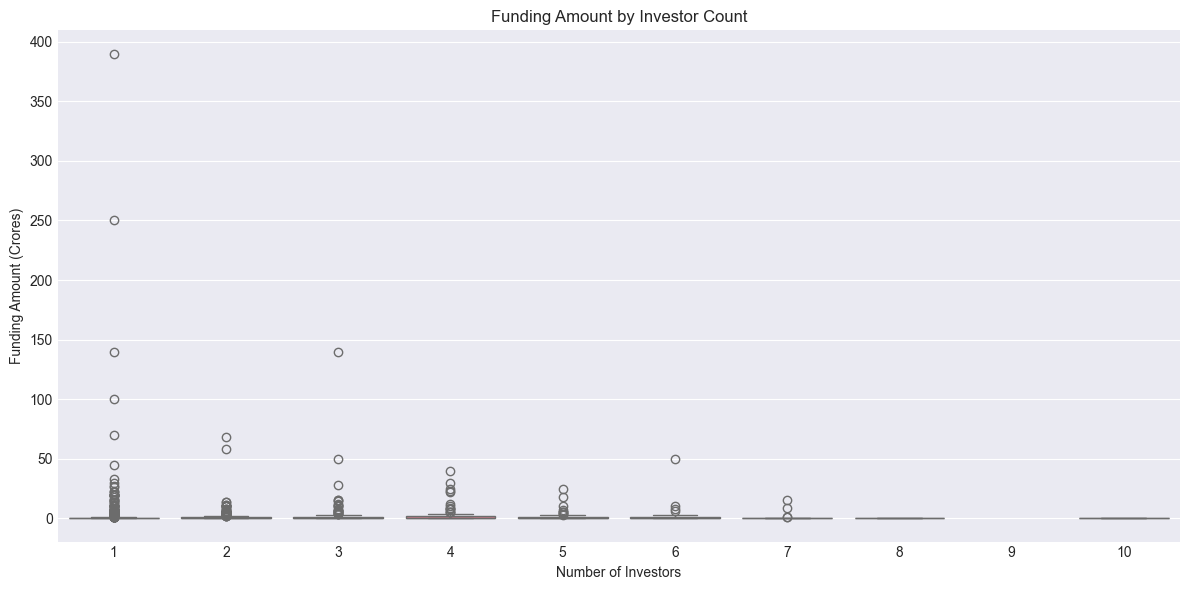

In [17]:
# Visualization: Investor count vs funding amount
plt.figure(figsize=(12, 6))
df_inv = df[df['Investor_Count'] > 0].copy()
sns.boxplot(data=df_inv[df_inv['Investor_Count'] <= 10], x='Investor_Count', y='Amount_Crores')
plt.xlabel('Number of Investors')
plt.ylabel('Funding Amount (Crores)')
plt.title('Funding Amount by Investor Count')
plt.tight_layout()
plt.savefig('../visuals/eda/investor_count_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 7. Correlation Analysis

Examine relationships between numerical variables.

In [18]:
# Correlation matrix for numerical variables
corr_cols = ['Year', 'Quarter', 'Stage_Order', 'Amount_Crores', 'Investor_Count']
df_corr = df[corr_cols].dropna()
correlation_matrix = df_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

Correlation Matrix:
                 Year  Quarter  Stage_Order  Amount_Crores  Investor_Count
Year            1.000   -0.095        0.055          0.100          -0.055
Quarter        -0.095    1.000        0.015          0.017          -0.014
Stage_Order     0.055    0.015        1.000          0.089           0.076
Amount_Crores   0.100    0.017        0.089          1.000          -0.001
Investor_Count -0.055   -0.014        0.076         -0.001           1.000


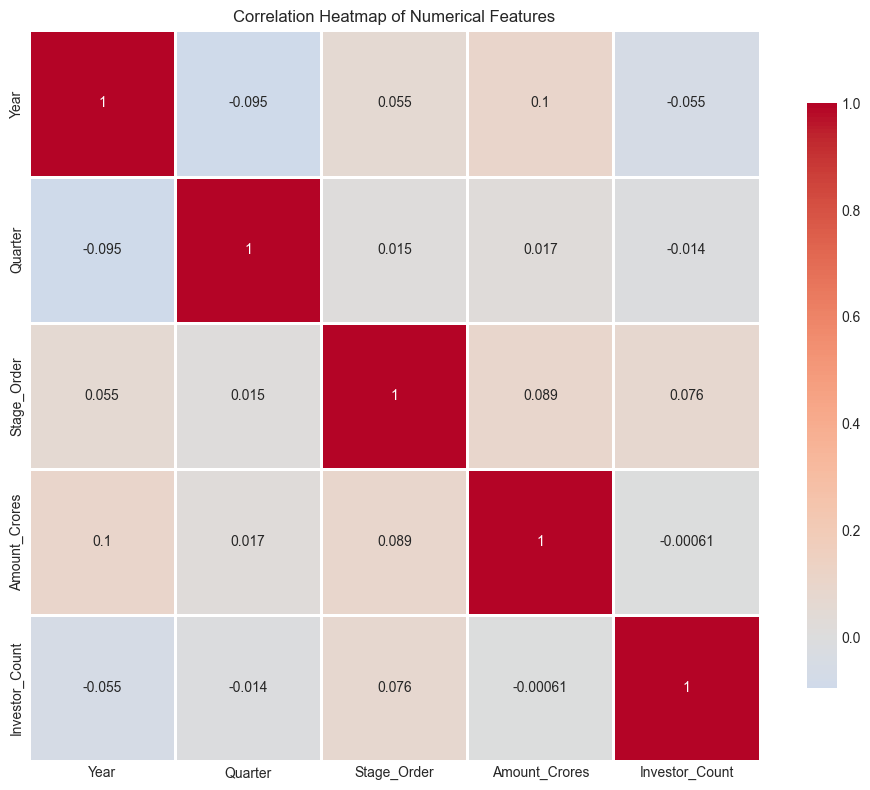

In [19]:
# Visualization: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('../visuals/eda/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 8. Distribution Analysis: Funding Amount

Analyze the distribution of funding amounts to understand skewness and outliers.

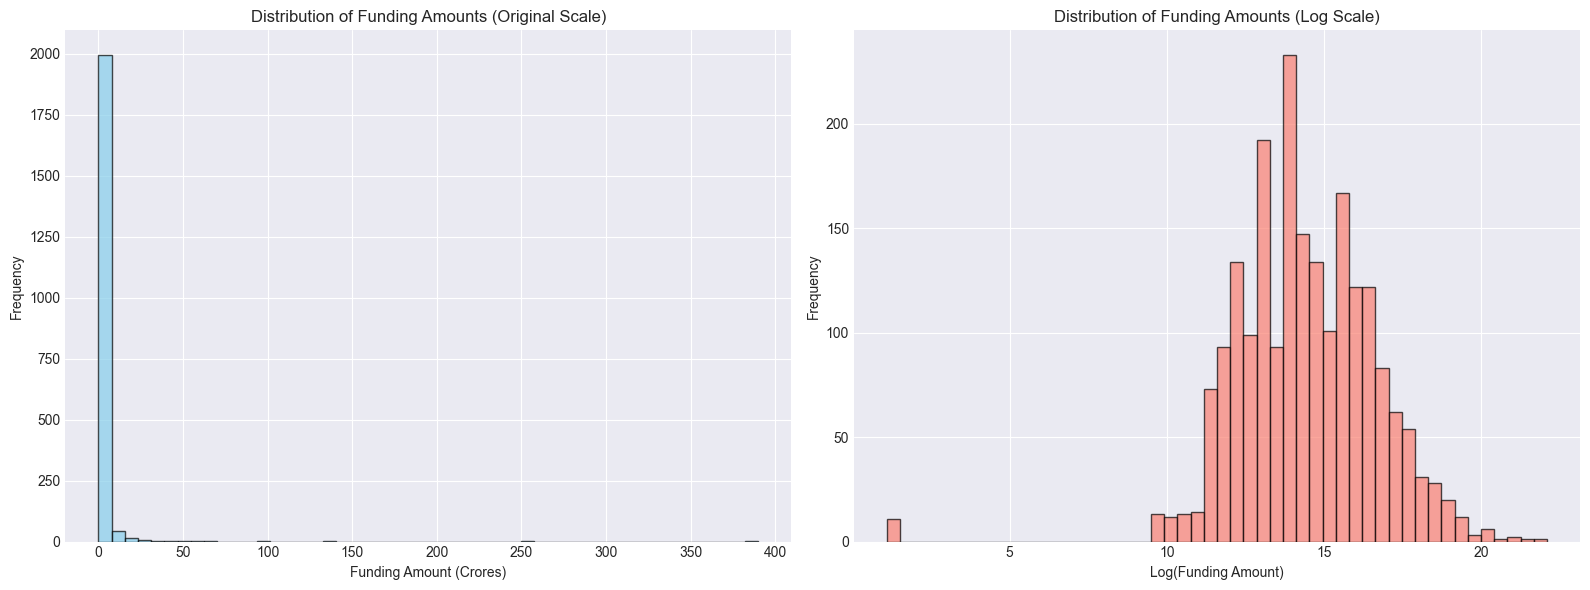

Skewness (original): 22.20
Skewness (log): -0.85


In [20]:
# Histogram and KDE of funding amounts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original scale
df['Amount_Crores'].dropna().plot(kind='hist', bins=50, ax=ax1, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Funding Amount (Crores)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Funding Amounts (Original Scale)')

# Log scale
df['Funding_Amount_Log'].dropna().plot(kind='hist', bins=50, ax=ax2, alpha=0.7, color='salmon', edgecolor='black')
ax2.set_xlabel('Log(Funding Amount)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Funding Amounts (Log Scale)')

plt.tight_layout()
plt.savefig('../visuals/eda/amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Skewness (original): {df['Amount_Crores'].skew():.2f}")
print(f"Skewness (log): {df['Funding_Amount_Log'].skew():.2f}")

---
## 9. Top Funded Startups

Identify the highest funded startups in the dataset.

In [21]:
# Top 20 funded startups
top_startups = df.nlargest(20, 'Amount_Crores')[['Startup Name', 'City_Clean', 'Industry Vertical', 
                                                   'Stage', 'Amount_Crores', 'Year']]
print("Top 20 Funded Startups:")
print(top_startups.to_string(index=False))

Top 20 Funded Startups:
       Startup Name City_Clean                  Industry Vertical          Stage  Amount_Crores   Year
   Rapido Bike Taxi  Bengaluru                     Transportation       Series B          390.0 2019.0
           Flipkart  Bengaluru                          eCommerce Private Equity          250.0 2017.0
              Paytm  Bengaluru                          ECommerce Private Equity          140.0 2017.0
           Flipkart  Bengaluru                          eCommerce Private Equity          140.0 2017.0
              Paytm      Noida                            FinTech    Undisclosed          100.0 2019.0
       Flipkart.com  Bengaluru                 Online Marketplace Private Equity           70.0 2015.0
              Paytm      Delhi   E-Commerce & M-Commerce platform Private Equity           68.0 2015.0
         True North     Mumbai                            Finance Private Equity           60.0 2018.0
              Udaan  Bengaluru                   

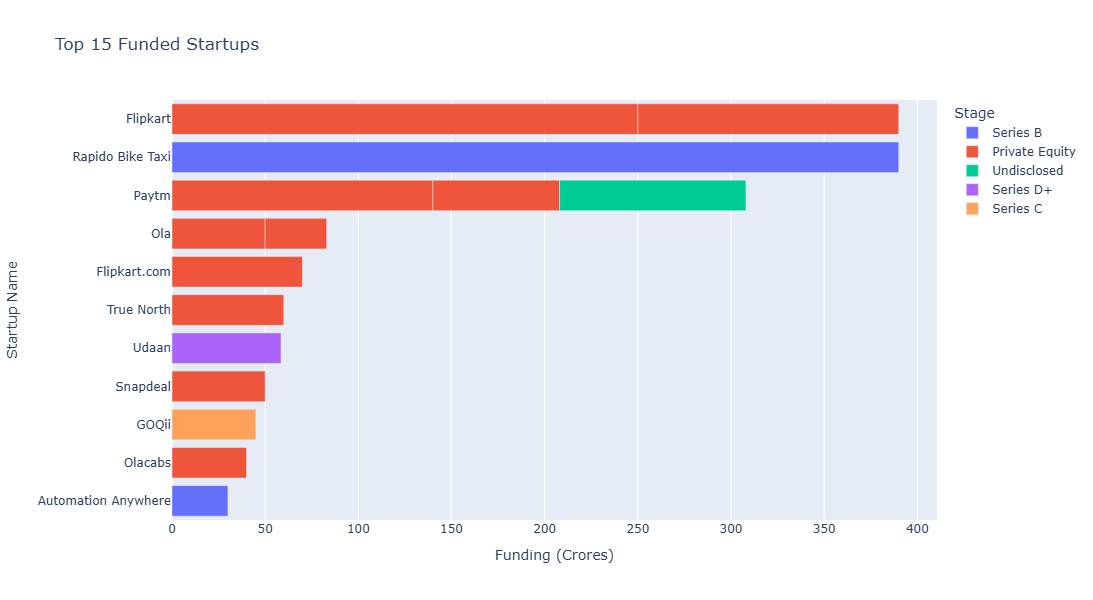

In [22]:
# Visualization: Top 15 funded startups
top15 = df.nlargest(15, 'Amount_Crores')
fig = px.bar(top15, x='Amount_Crores', y='Startup Name', 
             orientation='h',
             color='Stage',
             title='Top 15 Funded Startups',
             labels={'Amount_Crores': 'Funding (Crores)'})
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)
fig.write_html('../visuals/eda/top_startups.html')
fig.show()

---
##  Key Insights Summary

Document the major findings from this EDA to guide feature engineering and modeling.

###  **Key Findings from EDA:**

#### 1. **Temporal Trends:**
- Funding activity shows clear yearly patterns
- Certain quarters may show higher activity (Q1/Q4 effects)
- Year-over-year growth or decline patterns identified

#### 2. **Geographic Concentration:**
- Top 3 cities (likely Bengaluru, Mumbai, Delhi) dominate funding
- Significant concentration in tier-1 metros
- Emerging tier-2 cities may show potential

#### 3. **Industry Insights:**
- E-commerce, Fintech, and EdTech likely top sectors
- Clear industry preferences in funding amounts
- Some industries attract more deals but lower amounts

#### 4. **Stage Patterns:**
- Funding amounts increase with stage progression
- Series A/B show moderate amounts, Series D+ show high variance
- Private Equity deals typically largest ticket sizes

#### 5. **Investor Behavior:**
- Most deals have 1-3 investors
- Larger deals tend to have more investors (syndication)
- Investor count correlates with funding stage

#### 6. **Distribution Characteristics:**
- Funding amounts are highly right-skewed (few mega-deals)
- Log transformation reduces skewness
- Outliers present in all stages

#### 7. **Correlations:**
- `Stage_Order` likely correlates with `Amount_Crores`
- `Investor_Count` may correlate with funding amount
- Temporal features may show weak correlations

---

###  **Implications for Modeling:**

1. **Feature Engineering Priorities:**
   - Create `City_Category` (Metro vs Tier-2)
   - Create `Industry_Category` (consolidate rare industries)
   - Use `Funding_Amount_Log` for regression target
   - Create interaction features (Stage × City, Stage × Industry)

2. **Handling Imbalance:**
   - Class imbalance in stages (many Seed, few Series D+)
   - Consider SMOTE or class weighting for classification

3. **Missing Value Strategy:**
   - Impute missing amounts with median by stage
   - Keep "Undisclosed" as separate stage category

4. **Model Selection:**
   - Use ensemble methods (XGBoost, Random Forest)
   - Try both classification (stage prediction) and regression (amount prediction)

---

###  **Next Steps:**
 **Notebook 4:** Feature Engineering
- Create categorical encodings
- Generate interaction features
- Handle remaining missing values
- Prepare final modeling dataset